#1.Introducción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


En esta parte de modelos de clasificación se han realizado varios ejercicios de clasificación como parte del Proyecto Júpiter de Pontia sobre Visión artificial.

Comenzaremos cargando, con el código de la primera celda las librerías y el dataset. En la misma celda, se declaran una serie de variables relativas a las columnas del dataset, que luego utilizaremos. En la segunda celda de código cargamos una serie de funciones que luego utilizaremos para formatear el dataset (decidir las columnas que debe tener, normalización de variables, balanceado de las clases y separación entre conjuntos de train y test.

**Normalización**
Podemos omitir la normalización de las variable numéricas o proceder con StandardScaler, con RobustScaler o con un modelo mixto que nos permite elegir con qué columnas queremos utilizar cada uno de los los escaladores.

Los datos sin normalizar serán aptos para modelos que no son sensibles a la escala: Árboles de decisión, Random Forests, Gradient Boosting Machines (GBM), XGBoost. Modelos que no dependen de la distancia entre puntos.

Los datos normalizados serán aptos para su utilización con modelos sensibles a la escala de las características: Regresión logística, Support Vector Machines (SVM), Redes Neuronales, k-NN, Métodos de clustering (k-means, ).

**Informes**:
Una vez entrenado un modelo nos devuelve la precisión pero también podemos generar, a voluntad, dos tipo de informes a partir de la variable objetivo del conjunto de test y la predicción del algoritmo.

La **matriz de confusión**: nos permite ver las predicciones que se generan para todos los elementos de cada clase del conjunto de test.
Permite ver de manera gráfica las predicciones correctas y erróneas y permite observar como se reparten entre las otras clases los errores de predicción.

El **Classification Report** que proporciona los siguientes valores:

- *precision*: proporción de verdaderos positivos entre todos los pronosticados como positivos

- *recall*: (sensibilidad) proporción de verdaderos positivos entre todos los verdaderos positivos

- *f1-score*: da una idea del balance entre precisión y recall

- *support*: el número de elementos de cada clase que había en el conjunto de test

- *accuracy*: proporción de predicciones correctas

- *macro avg*: promedia precisión, recall y f1-score para cada clase y luego promedia los de todas las clases

- *weighted avg*: el promedio se hace considerando la proporcion de instancias por clase. Es significativo cuando se emplean datasets desbalanceados

En el caso de un RandomForestClassifier podemos sacar por pantalla, una vewz entrenado el modelo, el valor relativo de cada variable.

#2.Resumen de variables, parámetros y resultados por modelo

Se han entrenado los siguientes modelos con el set de datos proporcionado para el Proyecto. Se describe brevemete para cada entrenamiento la preparación de los datos elegida, Los parámetros seleccionados como mejores y los resultados obtenidos.

Para este entrenamiento se ha seleccionado un dataset en el que se han incluído las siguientes columnas:

Como referencias temporales se han incluido el tiempo_recogida y tiempo_venta del dataset original considerando que contienen una referencia temporal válida sencilla y se han añadido otras que se ha considerado podrían ser útiles para encontrar relaciones: una columna 'dif' con la diferencia entre las anteriores, el día de la semana de recogida (codificado con pd.getdummies) y la hora del día de recogida (codificado de la misma manera).

En cuanto a precios y costes se han añadido las columnas coste_peso (relación entre coste_inicial y peso), precio_peso (igual para precio_venta y peso) y peso.

Se han añadido los datos de proveedor, cliente y marca que se han codificado con pandas.getdummies.


##2.1.RandomForestClassifier

Columnas del dataset:  tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso, cols_marca, cols_proveedor, cols_dia_sem_recogida, cols_hora_recogida .
Tratamiento de los datos: equilibrar dataset= SI, test_size= 0.3, normalización = Robust: tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso.
RFC:  n_estimators: 500, criterion: entropy, max_depth: None, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
La precisión de RFC es 91.89     ==train: 13.0 min. 57.1 seg.

De los cuatro modelos entrenados es el que consume mas tiempo, pero proporciona casi tanta precisión como el AdaBoostClassifier.

La matriz de confusión muestra una menor precisión al clasificar Guava, Apple y Kiwi.
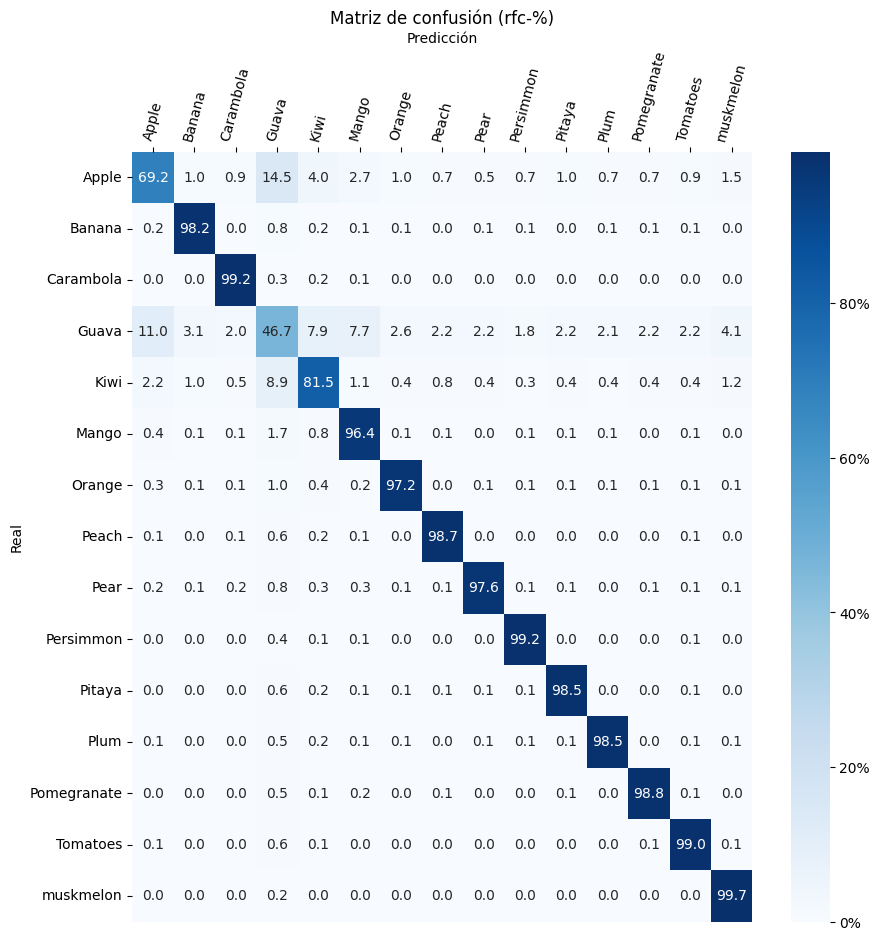

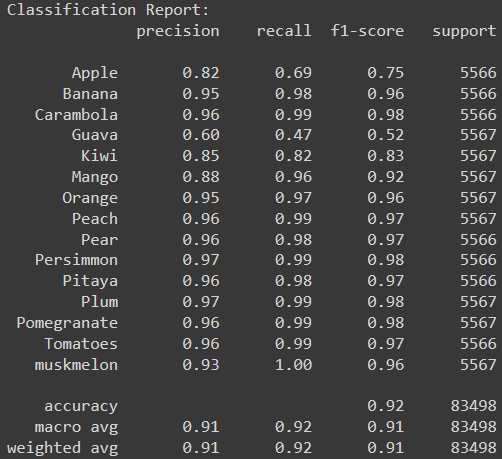
El RandomForestClassifier también nos informa de la importancia de las columnas:

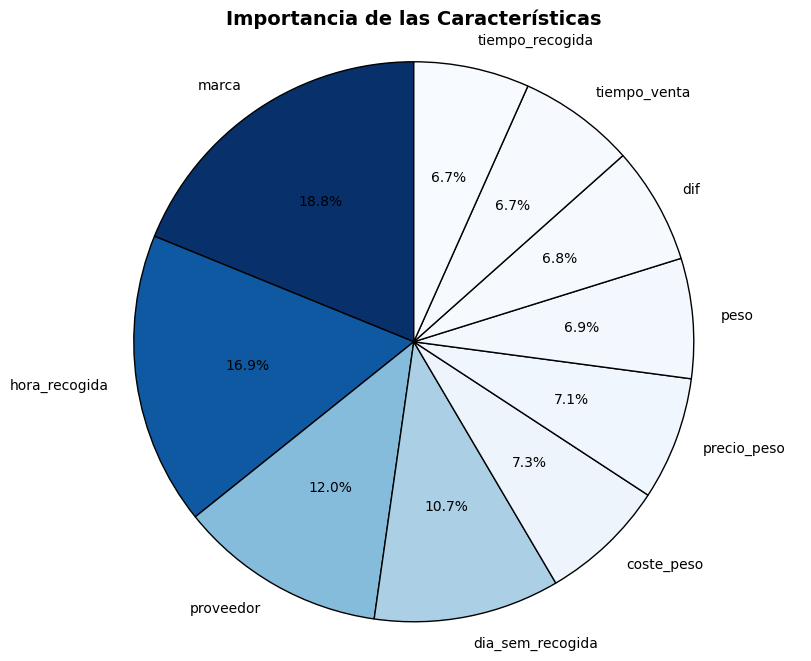

##2.2 KNeighborsClassifier

Columnas del dataset:  tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso, cols_marca, cols_proveedor, cols_dia_sem_recogida, cols_hora_recogida .
Tratamiento de los datos: equilibrar dataset= SI, test_size= 0.3, normalización = Robust: tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso.
KNN:  n_neighbors: 1, weights: distance, algorithm: brute, leaf_size: 30, p: 2
La precisión de KNN es 92.37    ==train: 2.0 min. 31.8 seg.

La matriz de confusión permite observar una menor precisión en Guava, Apple y Kiwi, y que, también un número significativo de otros tipos se clasifican erróneamente dentro de esos tipos.
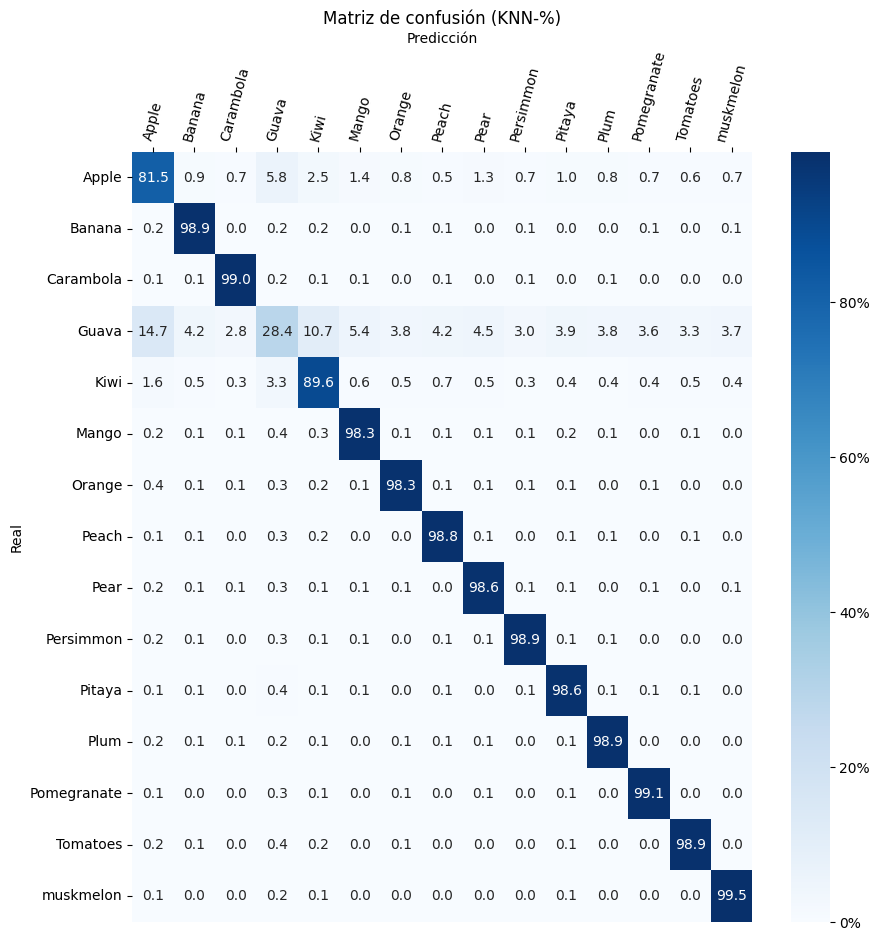

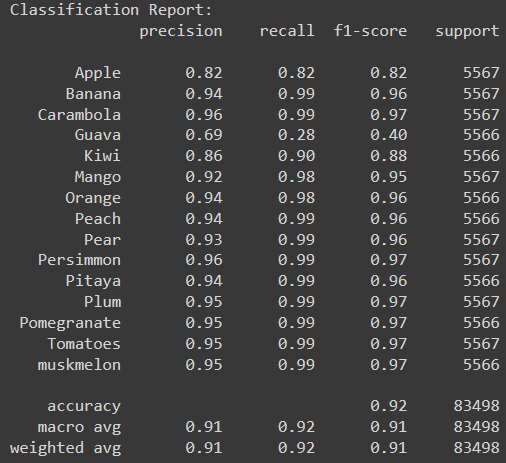

##2.3.DecisionTreeClassifier

Columnas del dataset:  tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso, cols_marca, cols_proveedor, cols_dia_sem_recogida, cols_hora_recogida .
Tratamiento de los datos: equilibrar dataset= SI, test_size= 0.3, normalización = Robust: tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso.
DTREE:  criterion: log_loss, splitter: random, max_depth: None, min_samples_split: 5, min_samples_leaf: 1, min_weight_fraction_leaf: 0.0, max_features: 152, random_state: None, max_leaf_nodes: None, min_impurity_decrease: 0.0, class_weight: None, ccp_alpha: 0.0
La precisión de DTREE es 73.61   ==    train: 0.0 min. 4.6 seg.

No es un gran resultado pero utilizaremos este modelo con los mismos parámetros como estimador del AdaBoostClassifier.

En la matriz de confusión se observa una precisión especialmente baja en Guava, Apple y Kiwi. Un número importante de estas frutas se clasifican erróneamente en otras clases y viceversa.
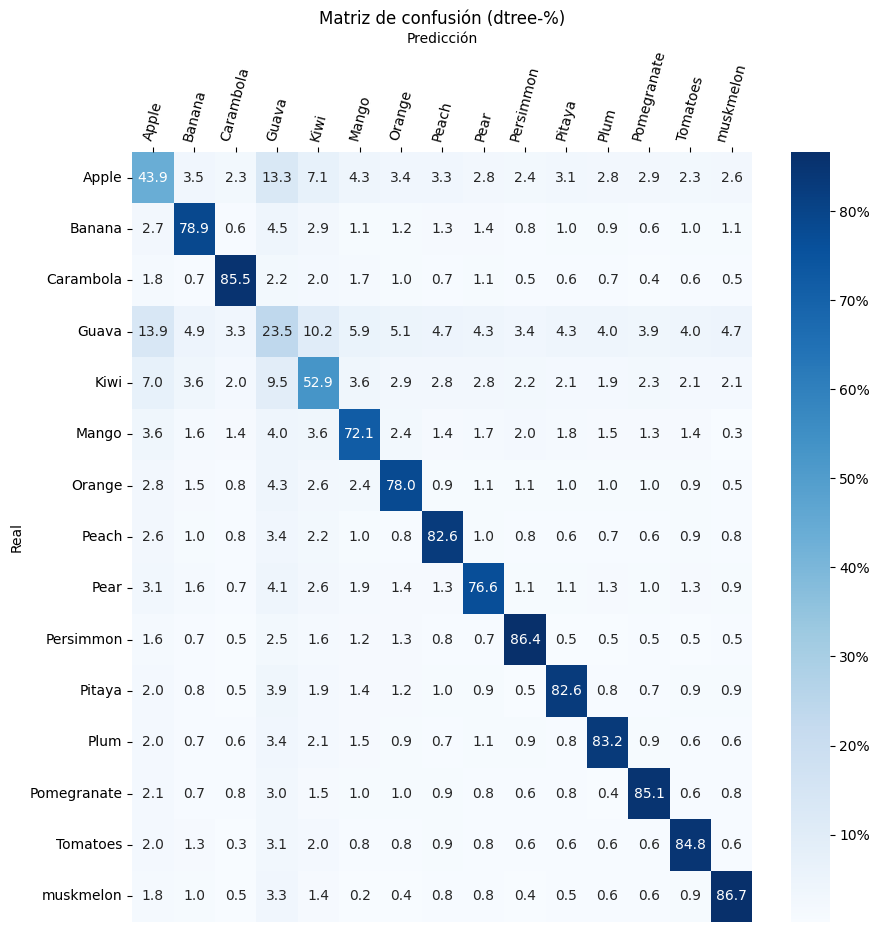

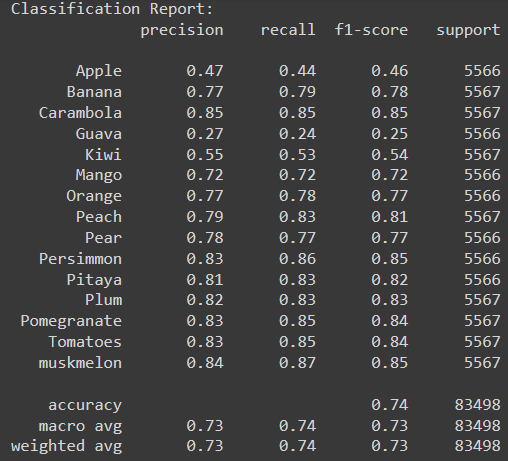

##2.4.AdaboostClassifier

Columnas del dataset:  tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso, cols_marca, cols_proveedor, cols_dia_sem_recogida, cols_hora_recogida .
Tratamiento de los datos: equilibrar dataset= SI, test_size= 0.3, normalización = Robust: tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso.
ADA:  estimator: DecisionTreeClassifier(criterion='log_loss', max_features=152,
                       min_samples_split=5, splitter='random'), n_estimators: 75, learning_rate: 1.0, algorithm: SAMME.R, random_state: None
La precisión de ADA es 94.24      ==train: 6.0 min. 48.9 seg.

La matriz de confusión sigue mostrando, aunque en menor grado, una distribución similar de los errores de clasificación.

En todos los casos la información de la matriz de confusión resulta avalada por la accuracy y el recall que muestra el classification report.
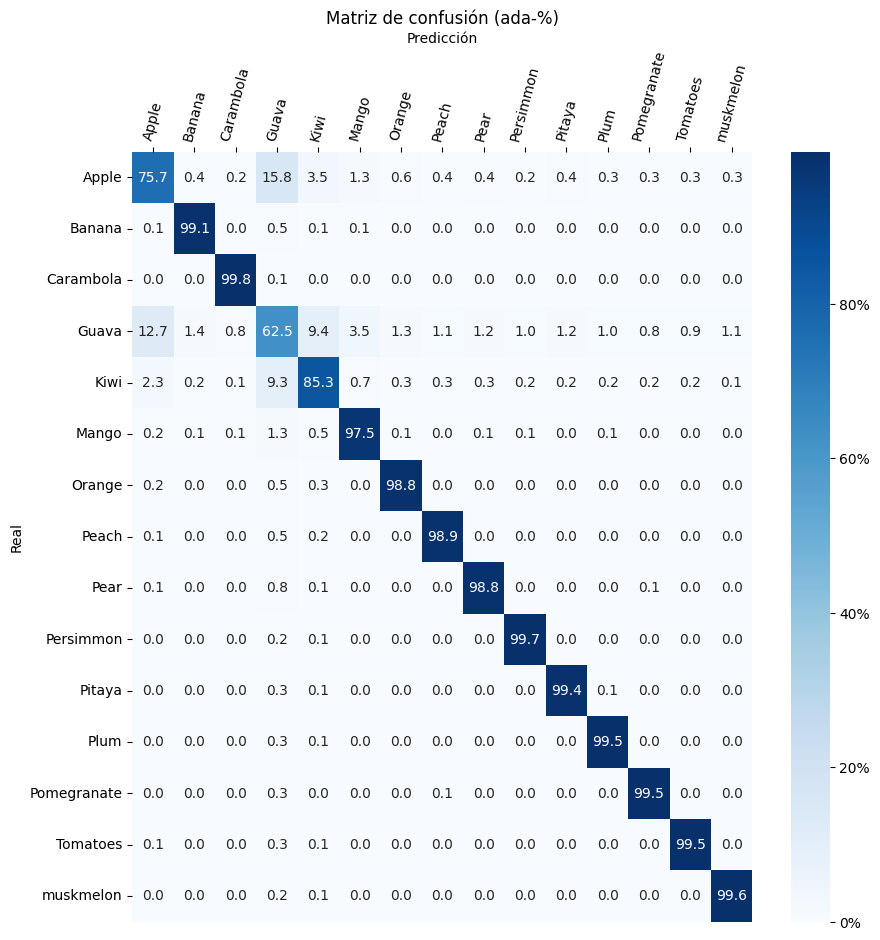

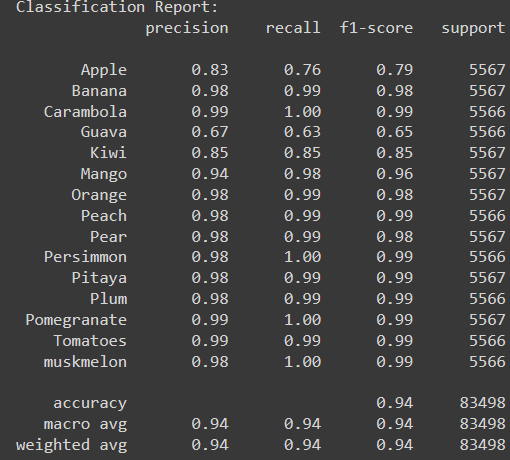

#3.Preparación y entrenamiento de modelos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import time
import joblib
import sys

Cargamos el dataset, declaramos variables que nos interesan y reducimos las variables numéricas a int32 y float32.

##3.1.Preparación de los datos

In [3]:

# El fichero 'vision_artificial_ML_prueba.csv' se ha generado al correr el notebook 'EDA_vision_artificial.ipynb'
df = pd.read_csv('/content/drive/MyDrive/Pontia Proyecto Jupiter Visión Art/Proyecto Final/ML/Datos de información/vision_artificial_ML.csv', sep=';')

# Creamos listas de las columnas etiquetadas con pd.get_dummies
columnas_marca = [columna for columna in df.columns if columna.startswith('marca_')]
columnas_proveedor = [columna for columna in df.columns if columna.startswith('proveedor_')]
columnas_cliente = [columna for columna in df.columns if columna.startswith('clientes_')]
columnas_hora_recogida = [columna for columna in df.columns if columna.startswith('hora_recogida_')]
columnas_dia_sem_recogida = [columna for columna in df.columns if columna.startswith('dia_sem_recogida_')]
# Columnas numéricas susceptibles de normalización
variables_normalizables = ['tiempo_recogida', 'tiempo_venta', 'dif', 'peso', 'coste_peso', 'precio_peso']
# Columna de la variable de salida
variable_de_salida = 'tipo'

columnas_a_cambiar_float = ['peso', 'coste_peso', 'precio_peso']
columnas_a_cambiar_int = ['dif', 'tiempo_recogida', 'tiempo_venta']
df[columnas_a_cambiar_float] = df[columnas_a_cambiar_float].astype('float32')
df[columnas_a_cambiar_int] = df[columnas_a_cambiar_int].astype('int32')

##3.2.Funciones auxiliares

In [4]:
######################################################################
##################  ESTA CELDA NO DEBE MODIFICARSE ###################
################ PARA EL USO NORMAL DE ESTE NOTEBOOK #################
######################################################################

#FUNCIONES NECESARIAS
# Función para generar una lista de columnas de forma resumida
def lista_cols(columnas):    #pone las columnas en lista_columnas de forma resumida
    lista_columnas = columnas
    if any(c in lista_columnas for c in columnas_marca):
        lista_columnas = [c for c in lista_columnas if c not in columnas_marca] + ['cols_marca']
    if any(c in lista_columnas for c in columnas_proveedor):
        lista_columnas = [c for c in lista_columnas if c not in columnas_proveedor] + ['cols_proveedor']
    if any(c in lista_columnas for c in columnas_cliente):
        lista_columnas = [c for c in lista_columnas if c not in columnas_cliente] + ['cols_cliente']
    if any(c in lista_columnas for c in columnas_dia_sem_recogida):
        lista_columnas = [c for c in lista_columnas if c not in columnas_dia_sem_recogida] + ['cols_dia_sem_recogida']
    if any(c in lista_columnas for c in columnas_hora_recogida):
        lista_columnas = [c for c in lista_columnas if c not in columnas_hora_recogida] + ['cols_hora_recogida']
    return lista_columnas


# Función para evitar algunos errores en la selección de variables a normalizar
def error_en_cols_normalizar(cols_standard, cols_robust):
    import sys
    cols_codificadas = columnas_marca+columnas_cliente+columnas_proveedor+columnas_hora_recogida
    columnas_a_normalizar = cols_standard + cols_robust
    columnas_normalizables = [c for c in columnas if c in variables_normalizables]
    if variable_de_salida in columnas_a_normalizar:
        print('La variable de salida no se debe normalizar: "tipo"')
        print('**Debe corregirse**')
        return sys.exit()
    if any(c not in columnas for c in columnas_a_normalizar):
        print('Valores de columnas que se intenta normalizar no existentes en dataset:', end=' ')
        for c in columnas_a_normalizar:
            if c not in columnas:
                print(c, end=', ')
        print('**Debe corregirse**')
        sys.exit()
    if any(c in cols_codificadas for c in columnas_a_normalizar):
        print('Los valores de columnas codificadas no se deben normalizar:', end=' ')
        for c in columnas_a_normalizar:
            if c in cols_codificadas:
                print(c, end=', ')
        print('**Debe corregirse**')
        return sys.exit()
    if any(c in columnas_a_normalizar for c in columnas):
        if any(c not in columnas_a_normalizar for c in columnas_normalizables):
            print('Algunas variables numéricas no se normalizarán:', end=' ')
            for c in columnas_normalizables:
                if c not in columnas_a_normalizar:
                    print(c, end=', ')
            salir = input('¿Salir?  (s/n):').strip().lower()
            if salir != 'n':
                sys.exit()
            return

# Funcion que selecciona columnas, normaliza, equilibra las clases y divide datos en train y test
def preparar_datos(columnas, equilibrar=True, normaliza=False, test_size=.3,
           cols_standard=[], cols_robust=[]):
    s_scaler = StandardScaler()
    r_scaler = RobustScaler()

    data = df[columnas+ [variable_de_salida]]

    # Comprobar algunos errores en las columnas a normalizar
    error_en_cols_normalizar(args_datos['cols_standard'], args_datos['cols_robust'])

    # Normalizar datos según parametro normaliza
    if normaliza==False: # no normaliza
        pass
    elif normaliza=='mixto':    # Solo coste_peso y precio_peso con RobustScaler (Son los que tienen mas outliers)
        data[cols_standard] = s_scaler.fit_transform(data[[cols_standard]])
        data[cols_robust] = r_scaler.fit_transform(data[cols_robust])
    elif normaliza=='standard':  # Todos con StandarScaler
        data[cols_standard+cols_robust] = s_scaler.fit_transform(data[cols_standard+cols_robust])
    elif normaliza=='robust': # Todos con RobustScaler
        data[cols_standard+cols_robust] = r_scaler.fit_transform(data[cols_standard+cols_robust])
    else:
        print("**no se indicó normalización válida**")
        sys.exit

    # Separar las variables de entrada y la salida
    X = data.drop('tipo', axis=1)#.values
    y = data['tipo']#.values

    # Equilibra las clases si se solicita
    if equilibrar:
        smote = SMOTE()
        X, y = smote.fit_resample(X, y)

    # Separa los datos en conjuntos de entrenamiento y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
    return X_train, X_test, y_train, y_test

#Funcion para generación de Matriz de confusión y classification_report
#utiliza los valores y_test, y_pred devueltos por el úlimo modelo que se ha entrenado
def informes_clasificacion(m_conf=False, cl_rep=False):
    # Decodificamos la variable objetivo del conjunto de test y de la predicción
    class_encoder = joblib.load('/content/drive/MyDrive/Pontia Proyecto Jupiter Visión Art/Proyecto Final/ML/Datos de información/class_encoder.pkl') #Esta class_encoder.pkl se genera en el EDA_vision_artificial
    nombres_clase = class_encoder.classes_

    #Si queremos ver los nombres de las clases descodificados
    y_test_decoded = class_encoder.inverse_transform(y_test)
    y_pred_decoded = class_encoder.inverse_transform(y_pred)
    # Creación de la matriz de confusión
    if m_conf:
        mat_confusion = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para la matriz de confusión con los nombres de las clases

        df_mat_confusion = pd.DataFrame(mat_confusion, index=nombres_clase, columns=nombres_clase)
        #Matriz de confusión en porcentajes
        mat_confusion_porcentage = mat_confusion.astype('float') / mat_confusion.sum(axis=1)[:, np.newaxis] * 100
        df_mat_confusion_porcentage = pd.DataFrame(mat_confusion_porcentage, index=nombres_clase, columns=nombres_clase)
        # Plotear la matriz de confusión
        plt.figure(figsize=(10, 10))
        #ax = sns.heatmap(df_mat_confusion, annot=True, fmt='d', cmap='Blues')
        ax = sns.heatmap(df_mat_confusion_porcentage, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'format': '%d%%'})
        ax.xaxis.tick_top()              #para poner las etiquetas del eje horizontal arriba
        plt.xticks(rotation=75)          #para que no se solapen las ponemos en vertical
        plt.xlabel('Predicción')          #Nombre del eje horizontal
        ax.xaxis.set_label_position('top')   # y lo ponemos en la parte superior
        plt.ylabel('Real')               #Título del eje vertical
        plt.title(f'Matriz de confusión ({modelo}-%)')    #Título del gráfico
        plt.show()
    if cl_rep:
        class_report = classification_report(y_test, y_pred, target_names=nombres_clase)
        print("Classification Report:")
        print(class_report)
    return


##3.3.Funciones de entrenamiento

In [5]:
######################################################################
##################  ESTA CELDA NO DEBE MODIFICARSE ###################
################ PARA EL USO NORMAL DE ESTE NOTEBOOK #################
######################################################################

# Función para entrenar un ALGORITMO y devolver la accuracy y datos para otras métricas
def entrenar(algoritmo):
    X_train, X_test, y_train, y_test = preparar_datos(columnas, **args_datos)#(columnas, equilibrar, normaliza, test_size)
    print('Columnas del dataset: ', ', '.join(lista_cols(columnas)),'.')
    argumentos_datos = ', '.join([f"{clave}: {valor}" for clave, valor in args_datos.items()])
    if args_datos['normaliza']==False:
        normalizacion = 'NO'
    elif args_datos['normaliza']== 'mixto':
        normalizacion = 'Mixta: Standard:'+', '.join(args_datos['cols_standard'])+', Robust:'+', '.join(args_datos['cols_robust'])
    elif args_datos['normaliza']== 'standard':
        normalizacion = 'Standard: '+', '.join(args_datos['cols_standard']+args_datos['cols_robust'])
    elif args_datos['normaliza']== 'robust':
        normalizacion = 'Robust: '+', '.join(args_datos['cols_standard']+args_datos['cols_robust'])
    else:
      print('\n\nValor del parámetro "normaliza" no válido.   **DEBE MODIFICARSE**\n\n')
      sys.exit()
    print(f"Tratamiento de los datos: equilibrar dataset= {'SI' if args_datos['equilibrar']==True else 'NO'}, test_size= {args_datos['test_size']}, "
        f"normalización = {normalizacion}.")

    train_test_sets = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    inicio = time.time()
    if algoritmo == 'KNN':
        argumentos_KNN = ', '.join([f"{clave}: {valor}" for clave, valor in args_knn.items()])
        print('KNN: ', argumentos_KNN)
        y_pred, importancia_variables = KNN(**train_test_sets, **args_knn)
    elif algoritmo == 'rfc':
        argumentos_RFC = ', '.join([f"{clave}: {valor}" for clave, valor in args_rfc.items()])
        print('RFC: ', argumentos_RFC)
        y_pred, importancia_variables = RandForest(**train_test_sets, **args_rfc)
    elif algoritmo == 'ada':
        argumentos_ADA = ', '.join([f"{clave}: {valor}" for clave, valor in args_ada.items()])
        print('ADA: ', argumentos_ADA)
        y_pred, importancia_variables = AdaBoostC(**train_test_sets, **args_ada)
    elif algoritmo == 'dtree':
        argumentos_DTREE = ', '.join([f"{clave}: {valor}" for clave, valor in args_dtree.items()])
        print('DTREE: ', argumentos_DTREE)
        y_pred, importancia_variables = DecisionTree(**train_test_sets, **args_dtree)
    else:
        print('**No se ha definido un algoritmo válido**')
        sys.exit()
    fin = time.time()
    # Duración del proceso de entrenamiento
    print(f"train: {(fin-inicio)//60} min. {int((fin-inicio)%60*10)/10} seg.")

    return X_train, X_test, y_train, y_test, y_pred, importancia_variables

def KNN( X_train, X_test, y_train, y_test, n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2):

    KNC = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)
    KNC.fit(X_train, y_train)
    y_pred = KNC.predict(X_test)
    acc_KNN = accuracy_score(y_test, y_pred)
    print("La precisión de KNN es %2.2f" %(100*acc_KNN))
    return y_pred, None  #no devuelve importancia_variables

def RandForest( X_train, X_test, y_train, y_test, n_estimators=100, criterion='gini', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, max_features='sqrt'):
    RF = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
    min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features).fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    acc_RF = accuracy_score(y_test, y_pred)
    importancia_variables = RF.feature_importances_  #indica la importancia de cada variable. Suma 1
    print("La precisión de RFC es %2.2f" %(100*acc_RF))
    return y_pred, importancia_variables

def AdaBoostC( X_train, X_test, y_train, y_test, estimator=None, n_estimators=50, learning_rate=1.0,
              algorithm='SAMME.R', random_state=None):
    ADA = AdaBoostClassifier(estimator=estimator, n_estimators=n_estimators, learning_rate=learning_rate,
              algorithm=algorithm, random_state=random_state).fit(X_train, y_train)
    y_pred = ADA.predict(X_test)
    acc_ADA = accuracy_score(y_test, y_pred)
    print("La precisión de ADA es %2.2f" %(100*acc_ADA))
    return y_pred, None

def DecisionTree( X_train, X_test, y_train, y_test, criterion='gini', splitter='best', max_depth=None,
                 min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None,
                 ccp_alpha=0.0):
    DTREE = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,
                 min_samples_split=2, min_samples_leaf=min_samples_leaf,
                 min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features,
                 random_state=random_state, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease,
                 class_weight=class_weight, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    y_pred = DTREE.predict(X_test)
    acc_DTREE = accuracy_score(y_test, y_pred)
    print("La precisión de DTREE es %2.2f" %(100*acc_DTREE))
    return y_pred, None


##3.4.Selección de parámetros

In [6]:
#####           EN ESTA CELDA SE PUEDEN SELECCIONAR LOS PARÁMETROS:
##### =para preprocesar los datos (seleccionar columnas, equilibrar las clases, normalizar y separar en train y test)
##### =para los modelos de clasificación,
##### =el modelo a utilizar (KNeighborsClassifier, RandomForestClassifier, DecisionTreeClassifier, AdaBoostClassifier)
##### Ejecutando el código se preparan los datos y se entrena un modelo con los parámetros seleccionados.
################################################################################

####################################################################################
# SELECCIÓN DE LAS COLUMNAS a incorporar al dataset entre las siguientes:
#   'tiempo_recogida', 'tiempo_venta', 'dif', 'peso', 'coste_peso', 'precio_peso',
#   columnas_proveedor, columnas_cliente, columnas_marca, columnas_dia_sem_recogida, columnas_hora_recogida
columnas=['tiempo_recogida', 'tiempo_venta', 'dif', 'peso', 'coste_peso', 'precio_peso'] + \
    columnas_proveedor + columnas_cliente + columnas_marca + columnas_dia_sem_recogida + columnas_hora_recogida
#####################################################################################
# Argumentos para preparación datos
args_datos = {
    'equilibrar': True,      #True , False
    'test_size': .3,
    'normaliza': 'robust',   #False, 'mixto', 'standard', 'robust'.
    'cols_standard': [],
    'cols_robust': ['tiempo_recogida', 'tiempo_venta', 'dif', 'peso', 'coste_peso', 'precio_peso']
}
######################################################################################
# Argumentos para KNN
args_knn = {
    'n_neighbors': 1,        #5
    'weights': 'distance',    #{‘uniform’, ‘distance’}
    'algorithm': 'brute',     #{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    'leaf_size': 30,         #int, default=30
    'p': 2,                 #2, >=1
}
#######################################################################################
# Argumentos para RandomForestClassifier
args_rfc = {
    'n_estimators': 500,        #100
    'criterion': 'entropy',    #'gini'   “log_loss” , “entropy”
    'max_depth': None,          #None
    'min_samples_split': 2,    #2
    'min_samples_leaf': 1,     #1
    'max_features': 'sqrt'    #'sqrt'    “log2”, None, int or float,
}
########################################################################################
# Argumentos para AdaBoostClassifier
args_ada = {
    'estimator': DecisionTreeClassifier(criterion='log_loss', splitter='random',min_samples_split=5,
                                        max_features=152),
    'n_estimators': 75,       #50 [1, inf)
    'learning_rate': 1.0,      #1.0(0.0, inf)
    'algorithm': 'SAMME.R',   #{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’ /to be removed in v1.6 SAME will become the default
    'random_state': None
}
########################################################################################
# Argumentos para DecisionTreeClassifier
args_dtree = {
    'criterion': 'log_loss',       # {“gini”, “entropy”, “log_loss”}, default=”gini”
    'splitter': 'random',         # {“best”, “random”}, default=”best”
    'max_depth': None,          # int, default=None
    'min_samples_split': 5,     # int or float, default=2
    'min_samples_leaf': 1,      # int or float, default=1  [1, inf) or (0.0, 1.0)]
    'min_weight_fraction_leaf': 0.0,   # float, default=0.0
    'max_features': 152,     # int, float or {“sqrt”, “log2”}, default=None
    'random_state': None,
    'max_leaf_nodes': None,     # int, default=None [2,f]
    'min_impurity_decrease': 0.0,       # float, default=0.0
    'class_weight': None,       # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0         # non-negative float, default=0.0
}
########################################################################################
# MODELO A UTILIZAR

###Selecciona aqui el modelo que deseas entrenar##


modelo = 'rfc'         #'KNN', 'rfc', 'ada', 'dtree'


# Solo 'rfc' devuelve importancia_variables
X_train, X_test, y_train, y_test, y_pred, importancia_variables = entrenar(modelo) #'KNN', 'rfc',



<ipython-input-4-3656d1dcd587>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_standard+cols_robust] = r_scaler.fit_transform(data[cols_standard+cols_robust])


Columnas del dataset:  tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso, cols_marca, cols_proveedor, cols_dia_sem_recogida, cols_hora_recogida .
Tratamiento de los datos: equilibrar dataset= SI, test_size= 0.3, normalización = Robust: tiempo_recogida, tiempo_venta, dif, peso, coste_peso, precio_peso.
RFC:  n_estimators: 500, criterion: entropy, max_depth: None, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
La precisión de RFC es 91.89
train: 13.0 min. 57.1 seg.


##3.5. Matriz de confusion

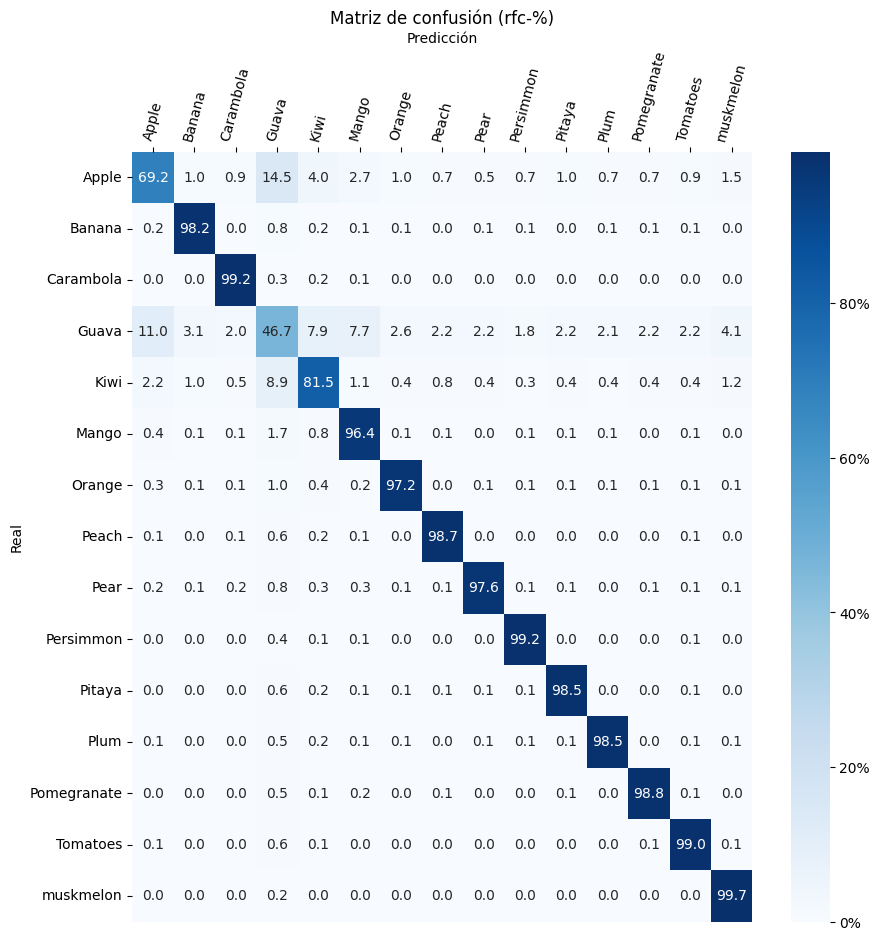

Classification Report:
              precision    recall  f1-score   support

       Apple       0.82      0.69      0.75      5566
      Banana       0.95      0.98      0.96      5566
   Carambola       0.96      0.99      0.98      5566
       Guava       0.60      0.47      0.52      5567
        Kiwi       0.85      0.82      0.83      5567
       Mango       0.88      0.96      0.92      5567
      Orange       0.95      0.97      0.96      5567
       Peach       0.96      0.99      0.97      5567
        Pear       0.96      0.98      0.97      5566
   Persimmon       0.97      0.99      0.98      5566
      Pitaya       0.96      0.98      0.97      5566
        Plum       0.97      0.99      0.98      5567
 Pomegranate       0.96      0.99      0.98      5567
    Tomatoes       0.96      0.99      0.97      5566
   muskmelon       0.93      1.00      0.96      5567

    accuracy                           0.92     83498
   macro avg       0.91      0.92      0.91     83498
wei

In [7]:
############################################################################################################
##  Ejecutar esta celda si se quiere que se imprima la matríz de confusión y/o el classification_report
############################################################################################################

informes_clasificacion(m_conf=True, cl_rep=True)  #m_conf, cl_rep



##3.6.Ejecutar sólo si se ha entrenado un RFC

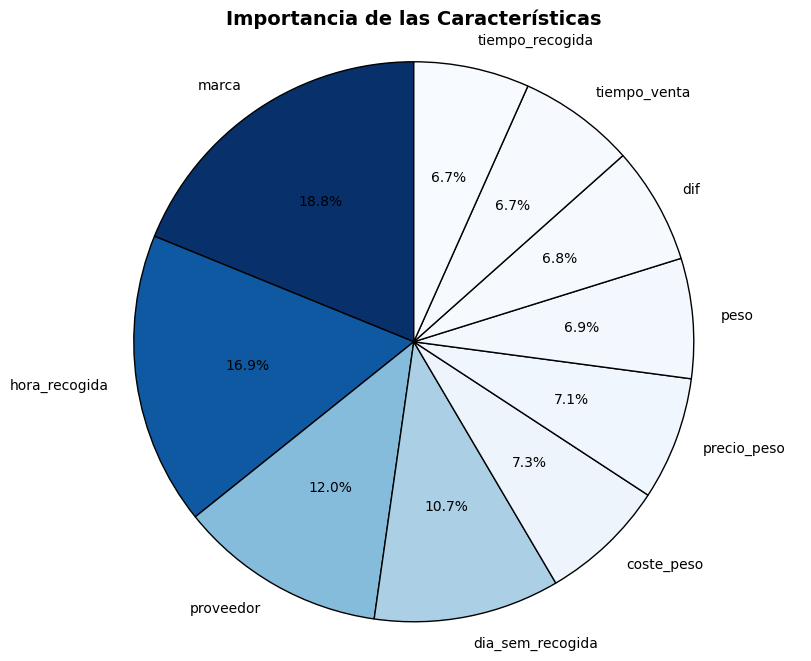

In [8]:
#########################################################################
###  EJECUTAR ESTE CÓDIGO, DESPUÉS DE ENTRENAR UN RFC, SI QUEREMOS QUE
### SE MUESTRE LA IMPORTANCIA DE LAS VARIABLES PROPORCIONADAS AL MODELO
#########################################################################
if importancia_variables is None:
    print('No se ha entrenado un RandomForestClassifier')
    sys.exit()
# Nombres de las características
df_importancia = pd.DataFrame({'Columna': columnas, 'Importancia': importancia_variables})
nuevos_registros = {'Columna':[], 'Importancia':[]}
eliminar_filas = []
columnas_codificadas = {'proveedor': columnas_proveedor, 'cliente': columnas_cliente,
                        'marca':columnas_marca, 'dia_sem_recogida':columnas_dia_sem_recogida,
                        'hora_recogida': columnas_hora_recogida}
# Cálculo de la importancia de cada agrupación de columnas
for k in columnas_codificadas.keys():
    if any(c in columnas for c in columnas_codificadas[k]):
        nuevos_registros['Columna'].append(k)
        eliminar_filas = eliminar_filas + columnas_codificadas[k]
        suma_importancias = 0
        for c in columnas_codificadas[k]:
            suma_importancias = suma_importancias + df_importancia[df_importancia['Columna']==c]['Importancia'].sum()
        nuevos_registros['Importancia'].append(suma_importancias)
# Sustitución de las columnas codificadas por las columnas agrupadas
#Eliminar las columnas codificadas
df_importancia = df_importancia[~df_importancia['Columna'].isin(eliminar_filas)]

#Insertar las columnas agrupadas.
df_importancia = pd.concat([df_importancia, pd.DataFrame(nuevos_registros)], ignore_index = True)

#Ordenar las características por importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
#df_importancia      #imprimiría el df_importancia como una tabla
plt.figure(figsize=(10, 8))
# Crear una paleta de colores en tonalidades de azul con tonos más oscuros para mayores importancias
norm = plt.Normalize(df_importancia['Importancia'].min(), df_importancia['Importancia'].max())
colors = plt.cm.Blues(norm(df_importancia['Importancia']))

# Crear el gráfico de pastel
plt.pie(
    df_importancia['Importancia'],
    labels=df_importancia['Columna'],
    autopct=lambda p: '{:.1f}%'.format(p),
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='black')  # Añadir borde negro para mayor formalidad
)

# Añadir título y ajustar el aspecto
plt.title('Importancia de las Características', fontsize=14, fontweight='bold')
plt.axis('equal')  # Para que el pie chart sea un círculo

# Mostrar el gráfico
plt.show()